In [129]:
import numpy as np
import sympy
from sympy import Expr, Basic
from sympy import S, Symbol, symbols, simplify, solve, solveset, diff, plot, plot_parametric, plot_implicit, latex, Integral
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.plotting.plot import Plot
from sympy.core.numbers import Pi as Pi_t
from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
from typing import overload, Union, Optional

@overload
def print_sympy_entity(text: Optional[str] = None, raw: bool = True) -> None:
    ...

@overload
def print_sympy_entity(text: Optional[str] = None, expression: Optional[Union[str, Basic]] = None, raw: bool = True) -> None:
    ...

def print_sympy_entity(*args, **kwargs) -> None:
    text: Optional[str] = kwargs.get("text", None)
    expression: Optional[Union[str, Basic]] = kwargs.get("expression", None)

    if text is None and args:
        text = args[0]
    
    if expression is None and len(args) > 1:
        expression = args[1]

    if expression is None:
        if text is not None:
            display(Latex("$\\text{" + text + "}$"))
        return

    if kwargs.get("raw", True):
        expression = latex(expression)
    
    expression = '$' + str(expression) + '$'
    if text is not None:
        expression = "$\\text{" + text + "}$ " + expression

    display(Latex(expression))

## Занятие 13
## Математический анализ
## Применение интегралов для вычисления площади поверхности тела вращения
### Задание 1.
Вычислить площадь поверхности, которая образуется в результате вращения $y = \sqrt{x}$ вокруг оси OX при $x$ от 0 до 1.

In [131]:

x: Symbol = Symbol('x', positive=True, real=True)
y: Expr = x**S.Half
S_OX: Expr = 2*Pi*Integral((y*(1 + y.diff(x)**2)**S.Half), (x, 0, 1))
print_sympy_entity("Интеграл:", S_OX)
S_Value: Expr = simplify(S_OX.doit())
print_sympy_entity("Значение площади:", S_Value)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Задание 2.
Вычислить площадь поверхности веретена, которое образуется в результате вращения одной полуволны синусоиды $y = \sin x$ вокруг оси OX.
#### Указание.

Для вычисления интеграла воспользоваться заменой переменных $t = \cos(x)$, для проведения замены пользоваться методом transform класса Integral. Также воспользоваться simplify при необходимости.

In [132]:
t: Symbol = Symbol('t', real=True, positive=True)
y: Sin = Sin(x)
S_OX1: Integral = Integral(2*Pi*y*(1 + y.diff(x)**2)**S.Half, (x, 0, Pi))
print_sympy_entity("Интеграл:", S_OX1)
replacement_res: Integral = S_OX1.transform(Cos(x), t)
S_Value1: Expr = simplify(replacement_res.doit())
print_sympy_entity("Значение площади:", S_Value1)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Задание 3.
Вычислить площадь поверхности образованной вращением вокруг ОХ кардиоиды 
$$
\left\{
\begin{matrix}
x=a(2\cos t-\cos 2t)\\
y=a(2\sin t-\sin 2t)
\end{matrix}
\right.
$$
Для облегчения расчетов упростить подынтегральную функцию с помощью simplify.

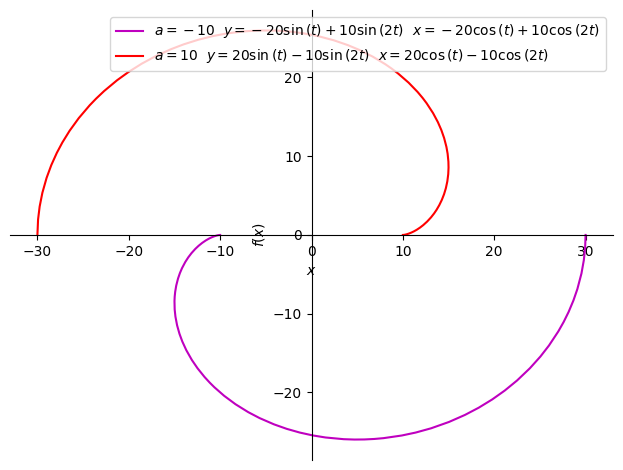

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [143]:
a: Symbol = Symbol('a', real=True, positive=True)
t: Symbol = Symbol('t', real=True, positive=True)
x_a: Expr = a*(2*Cos(t) - Cos(2*t))
y_a: Expr = a*(2*Sin(t) - Sin(2*t))

p: Plot = plot(axis_center=(0, 0), legend=True, show=False)
for a_val, color in ((-10, 'm'), (10, 'r')):
    p.extend(plot_parametric(
        x_a.subs({a: a_val}),
        y_a.subs({a: a_val}),
        (t, 0, Pi),
        line_color=color,
        label=fr"$a = {a_val}$  $y = {latex(y_a.subs({a: a_val}))}$  $x = {latex(x_a.subs({a: a_val}))}$",
        show=False))
p.show()

func: Expr = y_a*(x_a.diff(t)**2 + y_a.diff(t)**2)**S.Half
print_sympy_entity("Исходная функция:", func)
func = func.simplify().replace(Sin(2*t), 2*Sin(t)*Cos(t)).simplify()
print_sympy_entity("После замены:", func)

S_OX2: Integral = Integral(func, (t, 0, Pi))
print_sympy_entity("Интеграл:", S_OX2)
S_Value_2 = S_OX2.doit() * 2
print_sympy_entity("Площадь фигуры:", S_Value_2)

### Задание 4.
Вычислить площадь поверхности образованной вращением лемнискаты $r^2=a^2\cos2\phi$ вокруг полярной оси.

#### Указание.
Построить график, определить пределы интегрирования.
Упростить подынтегральную функцию с помощью simplify, затем с помощью display вывести полученный интерал. Замечая, что подынтегральное выражение можно упростить, если сократить, не обращать внимание, что $\cos(2\phi) = 0$ в $\pi/4$, вручную составить интеграл для окончательного расчета. 

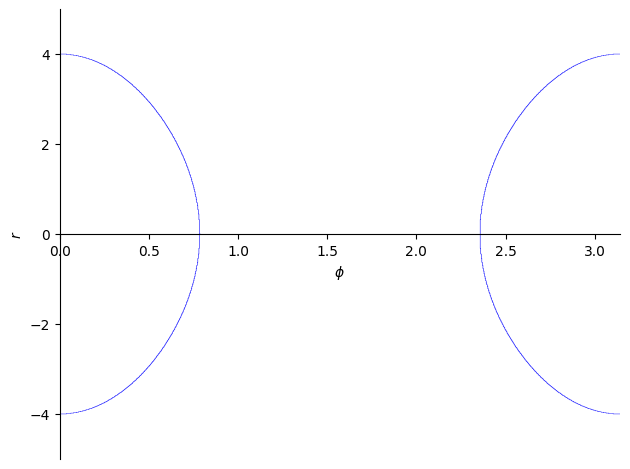

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [171]:
a: Symbol = Symbol('a', real=True, positive=True)
r: Symbol = Symbol('r', real=True, positive=True)
phi: Symbol = Symbol("phi", positive=True, real=True)
eq = sympy.Eq(r*r, a*a*Cos(2*phi))

plot_implicit(eq.subs({a: 4}), (phi, 0, Pi))
r_phi = solve(eq, r)[0]
S_OX3 = Integral(simplify(2*Pi*r_phi*Sin(phi)*(r_phi**2 + r_phi.diff(phi)**2)**S.Half), (phi, 0, Pi))
print_sympy_entity("Интеграл:", S_OX3)
func = 2*Pi*a*a*Sin(phi)
S_Value3 = func.integrate((phi, 0, Pi))
print_sympy_entity("Площадь фигуры:", S_Value3)

### Индивидуальное задание 
Найти площадь поверхности, образованной вращением $y = f(x)$ около оси OX.

Вариант 50

$ y = cos (2x) $

$ x = 0, x = π / 4 $

In [191]:
x = Symbol('x', positive=True, real=True)
t = Symbol('t', positive=True, real=True)
y = Cos(2*x)

S_OX4: Integral = Integral((2*Pi*y*(1 + y.diff(x)**2)**S.Half).simplify(), (x, 0, Pi/4))
print_sympy_entity("Интеграл:", S_OX4)
S_OX4_1: Integral = S_OX4.transform(Sin(2*x), t)
print_sympy_entity("Интеграл после замены Sin(2x) = t:", S_OX4_1)
S_Value4 = S_OX4_1.doit()
print_sympy_entity("Площадь фигуры:", S_Value4)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>